# first order and second order ordinary differential equations (ODE)s

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from jmspack.utils import JmsColors

In [2]:
from skmid.models import generate_model_attributes, DynamicModel
from skmid.integrator import RungeKutta4

In [3]:
if "jms_style_sheet" in plt.style.available:
    plt.style.use("jms_style_sheet")

In [4]:
session_info.show()

## Initial Parameters

In [6]:
# Choose an excitation signal
np.random.seed(42)
N = 2000  # Number of samples
fs = 1  # Sampling frequency [hz]
t = np.linspace(0, (N - 1) * (1 / fs), N)
m=-0.0001
c=1
x=np.arange(N)
f=5

df_input = pd.DataFrame(
    data={
        # "u1": m*x + c,
        # "u1": 2 * np.random.random(N),
        # "u2": 2 * np.random.random(N),
        "u1": np.sin(np.pi * f * x / fs),
        # "u4": 2 * np.random.random(N),
    },
    index=t,
)

x0 = [1, -1]  # Initial Condition x0 = [0;0]; [nx = 2]

parameter_dict={"N": N, 
                "fs": fs, 
                "t": t, 
                "x0": x0}
print("Initial Parameters")
print(parameter_dict)
display(df_input.head())
print(df_input.shape)

Initial Parameters
{'N': 2000, 'fs': 1, 't': array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.997e+03, 1.998e+03,
       1.999e+03]), 'x0': [1, -1]}


,u1
0.0,0.000000e+00
1.0,6.123234e-16
2.0,-1.224647e-15
3.0,5.389684e-15
4.0,-2.449294e-15


(2000, 1)


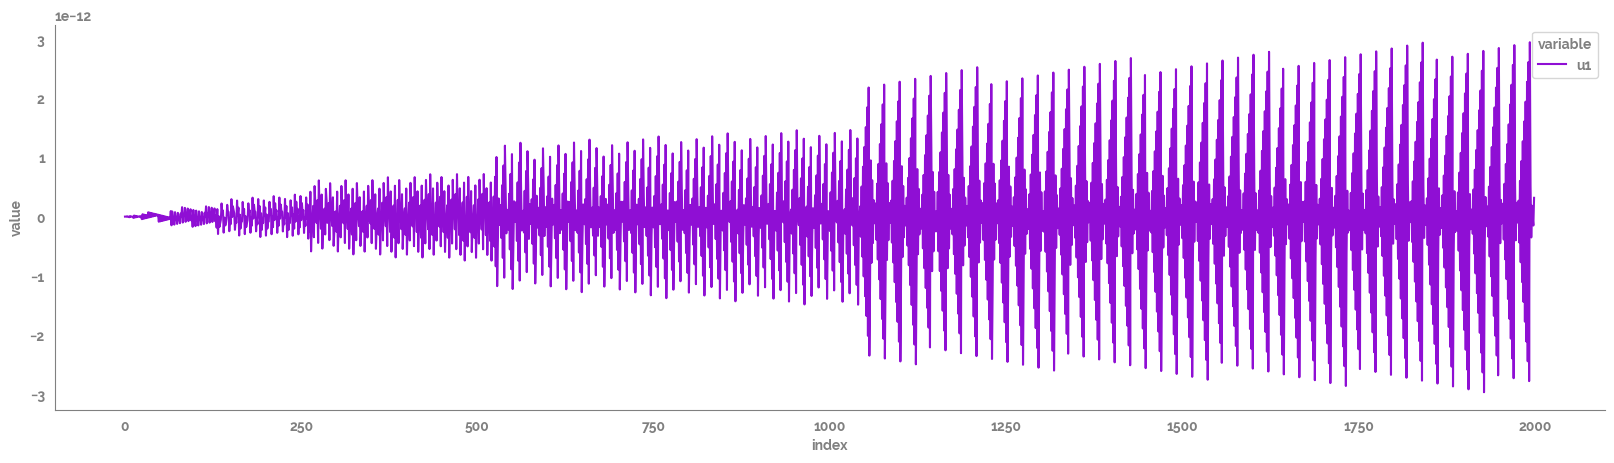

In [7]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df_input
                .reset_index()
                .melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable"
                )
_ = sns.despine()

# 1st order ODE

## Symbolics

In [8]:
(x, u, param) = generate_model_attributes(state_size=1, input_size=1, parameter_size=2)

# assign specific name
x0 = [0] # initial input value
kp, tp = param[0], param[1]

param_truth = [0.1, 0.5]  # ca.DM([0.1, 0.5])

rhs = [((-1/ tp)*x) + ((kp / tp)*u)] #1st order ODE
rhs

[MX(@1=p[1], (((p[0]/@1)*u)-(x/@1)))]

## Define the Dynamic Model

In [9]:
sys = DynamicModel(state=x, input=u, parameter=param, model_dynamics=rhs)
sys.print_summary()

Input Summary
-----------------
states    = ['x1']
inputs    = ['u1']
parameter = ['p1', 'p2']
output    = ['x1']

Dimension Summary
-----------------
 Number of inputs: 3
  Input 0 ("x(t)"): 1x1
  Input 1 ("u(t)"): 1x1
  Input 2 ("p"): 2x1
 Number of outputs: 1
  Output 0 ("xdot(t) = f(x(t), u(t), p)"): 1x1


## Run the forward simulation and save the output as a data frame

In [10]:
rk4 = RungeKutta4(model=sys, fs=fs)
rk4.simulate(initial_condition=x0[0], input=df_input, parameter=param_truth)

df_sim = rk4.output_sim_

display(df_sim.head())
print(df_sim.shape)

,x1
0.0,0.000000e+00
1.0,0.000000e+00
2.0,4.082156e-17
3.0,-6.803593e-17
4.0,3.366336e-16


(2001, 1)


## Plot the output

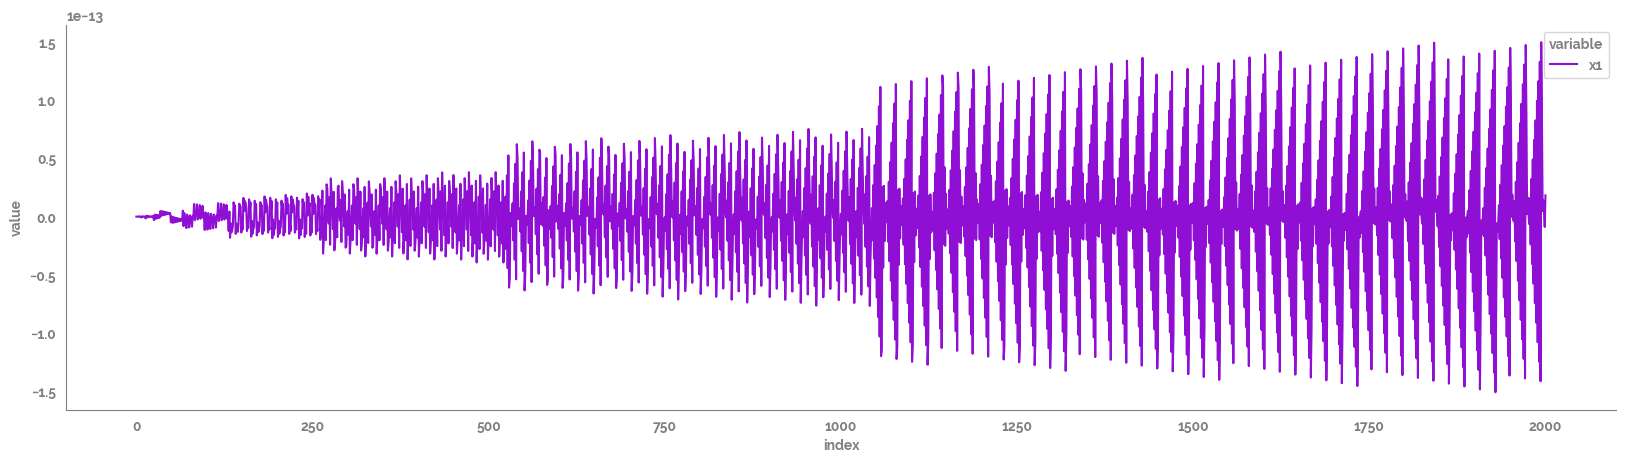

In [11]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df_sim
                .reset_index()
                .melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable"
                )
_ = sns.despine()

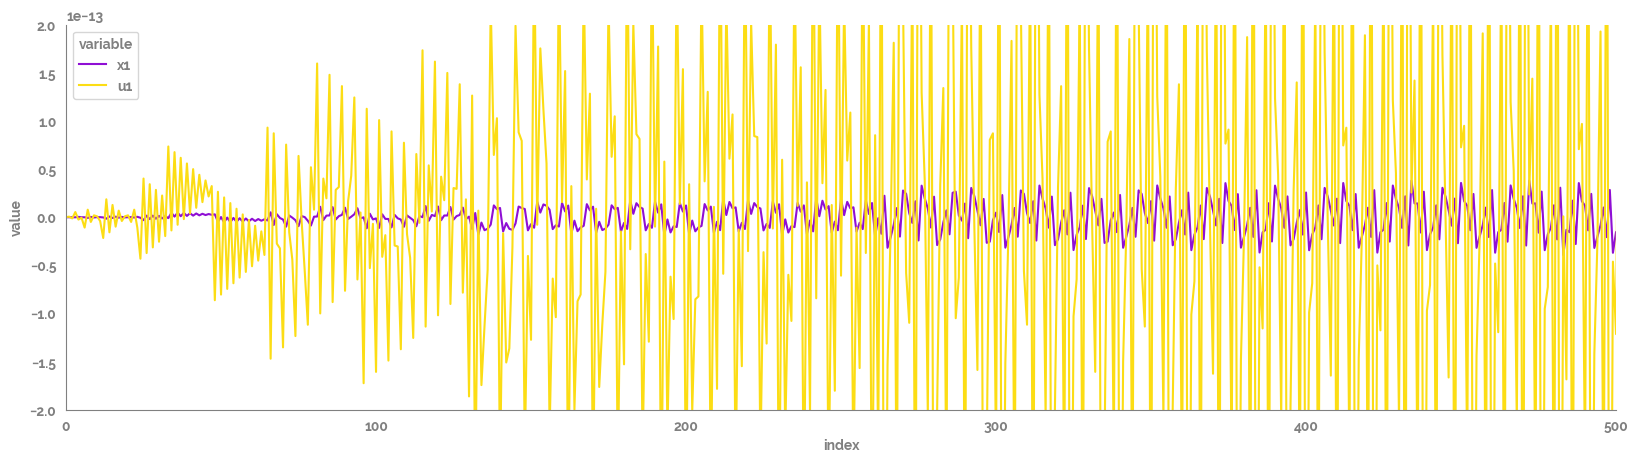

In [12]:
plot_df = pd.merge(df_sim, df_input, left_index=True, right_index=True)
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=plot_df
                .reset_index()
                .melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable"
                )
_ = sns.despine()
_ = plt.xlim(0,500)
_ = plt.ylim(-2e-13, 2e-13)

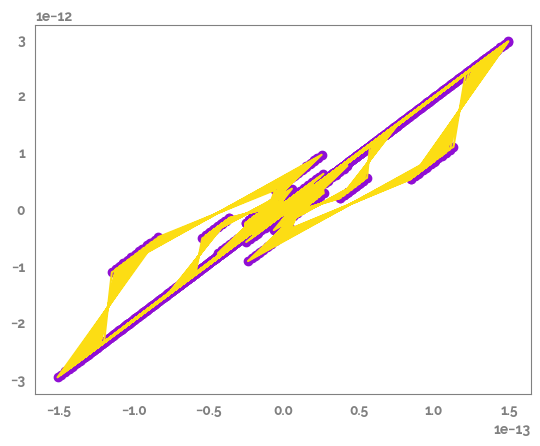

In [15]:
_ = plt.scatter(df_sim.values[1:], df_input.values)
_ = plt.plot(df_sim.values[1:], df_input.values, c=JmsColors.YELLOW)

# 2nd order ODE

## Symbolics

## TODO

In [ ]:
(x, u, param) = generate_model_attributes(state_size=1, input_size=1, parameter_size=2)

# assign specific name
x0 = [0] # initial input value
kp, tp = param[0], param[1]

param_truth = [0.1, 0.5]  # ca.DM([0.1, 0.5])

rhs = [((-1/ tp)*x) + ((kp / tp)*u)] #1st order ODE
rhs

## Define the Dynamic Model

In [ ]:
sys = DynamicModel(state=x, input=u, parameter=param, model_dynamics=rhs)
sys.print_summary()

## Run the forward simulation and save the output as a data frame

In [ ]:
rk4 = RungeKutta4(model=sys, fs=fs)
rk4.simulate(initial_condition=x0[0], input=df_input, parameter=param_truth)

df_sim = rk4.output_sim_

display(df_sim.head())
print(df_sim.shape)

## Plot the output

In [ ]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df_sim
                .reset_index()
                .melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable"
                )
_ = sns.despine()

In [ ]:
plot_df = pd.merge(df_sim, df_input, left_index=True, right_index=True)
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=plot_df
                .reset_index()
                .melt(id_vars="index"),
                x="index",
                y="value",
                hue="variable"
                )
_ = sns.despine()
_ = plt.xlim(0,500)
_ = plt.ylim(-2e-13, 2e-13)

In [ ]:
_ = plt.scatter(df_sim.values[1:], df_input.values)